In [3]:
# Package Installation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px

# Data Import and Pre Processing

In [141]:
cab_data = pd.read_csv('Cab_Data.csv')
cab_data = cab_data.dropna()

In [140]:
print(cab_data.info())
# Cab Data fields and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB
None


In [6]:
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'])
print(cab_data.info())
# Converting Date of Travel to Data Time from string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB
None


In [44]:
city_data = pd.read_csv('City.csv')
city_data = city_data.dropna()
city_data['Population'] =pd.to_numeric(city_data['Population'].str.replace(',', '').str.strip(), errors='coerce')
# Imprting city and data and converting population to numeric

In [45]:
print(city_data.info())
# City data fields and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     object
dtypes: int64(1), object(2)
memory usage: 608.0+ bytes
None


In [9]:
customer_data = pd.read_csv('Customer_ID.csv')
customer_data = customer_data.dropna()

In [10]:
print(customer_data.info())
# customer data fields and Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [11]:
txn_data = pd.read_csv('Transaction_ID.csv')
txn_data = txn_data.dropna()

In [12]:
print(txn_data.info())
# Transaction data fields and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB
None


In [13]:
holiday_data = pd.read_csv('US Holiday Dates (2016-2018).csv')
cab_data = cab_data.dropna()
# Downloaded holiday data for 2016 to 2018

In [143]:
print(holiday_data.info())
# Holiday Data fields and data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 12 to 338
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     55 non-null     datetime64[ns]
 1   Holiday  55 non-null     object        
 2   WeekDay  55 non-null     object        
 3   Month    55 non-null     int64         
 4   Day      55 non-null     int64         
 5   Year     55 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 3.0+ KB
None


In [145]:
holiday_data['Date'] = pd.to_datetime(holiday_data['Date'])
print(holiday_data.info())
holiday_data = holiday_data[(holiday_data['Date'] >= '2016-01-31') & (holiday_data['Date'] <= '2018-12-31')]
# Converting Date to Date Time from string

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 12 to 338
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     55 non-null     datetime64[ns]
 1   Holiday  55 non-null     object        
 2   WeekDay  55 non-null     object        
 3   Month    55 non-null     int64         
 4   Day      55 non-null     int64         
 5   Year     55 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 3.0+ KB
None


# Joining and Generating Master Data

In [146]:
cab_txn_join = pd.merge(cab_data,txn_data, on = ['Transaction ID'] )
# Join for Cab data and Transaction Data

In [17]:
display(cab_txn_join)
cab_txn_join.info()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card
...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card


<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
 7   Customer ID     359392 non-null  int64         
 8   Payment_Mode    359392 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 27.4+ MB


In [18]:
cab_txn_cust_join = pd.merge(cab_txn_join,customer_data, how = 'left', on = ['Customer ID'] )
# Joining Cab, Transaction and Customer Data

In [147]:
display(cab_txn_cust_join)
cab_txn_cust_join.info()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423


<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 35.6+ MB


In [148]:
master_data = pd.merge(cab_txn_cust_join,city_data, how = 'left', on = ['City'] )
master_data['Profit Margin'] = (master_data['Price Charged'] - master_data['Cost of Trip'])*100/master_data['Price Charged']
master_data['Cost per KM'] = master_data['Cost of Trip']/master_data['KM Travelled']
master_data['Profit per KM'] = (master_data['Price Charged'] - master_data['Cost of Trip'])/master_data['KM Travelled']
master_data['Holiday'] = master_data['Date of Travel'].isin(holiday_data['Date'])
master_data['Holiday'] = master_data['Holiday'].replace(True, 'Yes')
master_data['Holiday'] = master_data['Holiday'].replace(False, 'No')
master_data = master_data.drop_duplicates()
# Joining all the datasets including holidays and creating transformation columns for Profit/KM, Cost/KM, 
# Profit Margin and Holiday 

In [149]:
display(master_data)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit Margin,Cost per KM,Profit per KM,Holiday
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,"24,701",15.450869,10.30,1.882266,No
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,"24,701",6.601026,11.70,0.826904,No
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885,"24,701",22.019169,10.80,3.049558,No
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,814885,"24,701",6.835718,10.60,0.777751,No
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,814885,"24,701",14.695516,11.20,1.929439,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,418859,"127,001",8.492201,13.20,1.225000,No
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,418859,"127,001",6.067692,12.72,0.821667,No
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,418859,"127,001",20.001373,12.60,3.150270,No
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,418859,"127,001",21.986456,12.96,3.652500,No


In [150]:
master_data.info()
# Fields and datatypes for master data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  int64         
 13  Users               359392 no

In [23]:
master_data.isna().sum()
# There are no NA values after the joins, so we can infer that the data is factual 
# with genuine customers, cities and transactions

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
Profit Margin         0
Cost per KM           0
Profit per KM         0
Holiday               0
dtype: int64

<AxesSubplot:xlabel='KM Travelled', ylabel='Price Charged'>

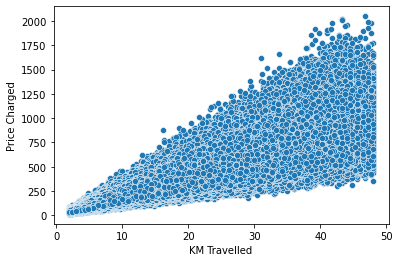

In [24]:
sns.scatterplot(data=master_data, x="KM Travelled", y="Price Charged")
# The scatter plot between KM travelled and Price charged shows limited or no outliers. We can see that  
# for the same distance the price charged lies between a range of values showing additional factors contributing to the 
# price than just distance

[Text(0.5, 1.0, 'Regression plot to detect outlier (Distance vs Cost)')]

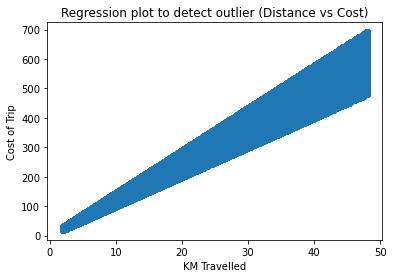

In [25]:
sns.regplot(x = 'KM Travelled', y = 'Cost of Trip', data=master_data).set(title='Regression plot to detect outlier (Distance vs Cost)')
# The Rgression plot for KM travelled and Cost shows symmertical linear increase in cost 
# with KM travelled with nearly no outliers

[Text(0.5, 1.0, 'KM Travelled vs Price Charged on Holidays')]

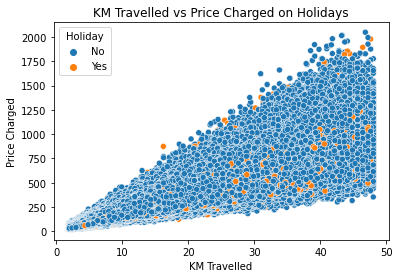

In [26]:
sns.scatterplot(data=master_data, x="KM Travelled", y="Price Charged", hue = 'Holiday').set(title = 'KM Travelled vs Price Charged on Holidays')
# It is intresting to see that even on holidays, the prices does not seem to be outliers 
# suggesting that there are more contributors like weather and traffic on other days that are 
# normalizing the effect of holidays

# Hypothesis Testing

In [ ]:
## Hypothesis 1: Is distance travelled by customer affecting the Profit per KM?

## Reason for the Hypothesis: In general, companies may choose to offer incetives 
## to customers for bulk purchase or longer engagement in the activity. Also shorter rides
## may be just meet minimal costs and may not attract higher profits 

In [28]:
# for rides with distance < 10 KM
dist1 = master_data[master_data['KM Travelled'] < 10]
mean = []
mean.append(dist1['Profit per KM'].mean())
print('Average Profit/KM for travel < 10 KM =', dist1['Profit per KM'].mean())

# for rides with distance >= 10 KM and <= 20 KM
dist2 = master_data[(master_data['KM Travelled'] >= 10) & (master_data['KM Travelled'] <= 20)]
mean.append(dist2['Profit per KM'].mean())
print('Average Profit/KM for travel between 10 and 20 KMs =', dist2['Profit per KM'].mean())

# for rides with distance >= 20 KM
dist3 = master_data[(master_data['KM Travelled'] >= 20)]
mean.append(dist3['Profit per KM'].mean())
print('Average Profit/KM for travel > 20 KM =', dist3['Profit per KM'].mean())

# We have split the distance into three categories i.e. 1) distance < 10 km 2) distance between 10 & 20 KM
# 3) distance > 10 KM. By calculating the average Profit/KM for these 3 categories, it is evident that there isn't much
# difference suggesting that distance is not contributing to the profit

Average Profit/KM for travel < 10 KM = 6.091128960375869
Average Profit/KM for travel between 10 and 20 KMs = 6.0589913959088895
Average Profit/KM for travel > 20 KM = 6.0919097565938864


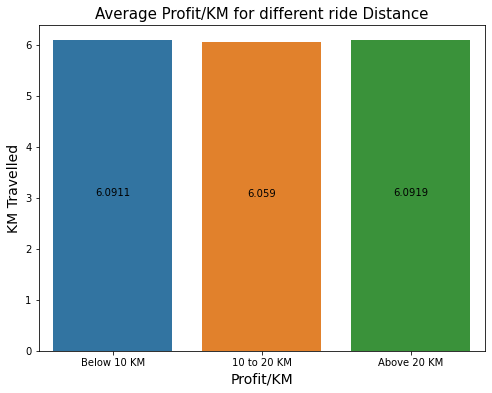

In [29]:
# Result Visualization
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=['Below 10 KM','10 to 20 KM','Above 20 KM'], y= mean)
plt.title('Average Profit/KM for different ride Distance', fontsize = 15)
plt.xlabel('Profit/KM', fontsize = 14)
plt.ylabel('KM Travelled', fontsize = 14)
for i, v in enumerate(mean):
    ax.text(i, v/2, str(round(v,4)), ha='center', color='black', fontsize=10)
plt.show()

In [30]:
# Calculating the Average Profit/KM with repect to Distance for Pink Cab
dist1_pink = dist1[dist1['Company'] == 'Pink Cab']
print('Average Profit/KM of Pink Cab for travel < 10 KMs:',dist1_pink['Profit per KM'].mean())
pink_mean = []
pink_mean.append(dist1_pink['Profit per KM'].mean())
dist2_pink = dist2[dist2['Company'] == 'Pink Cab']
print('Average Profit/KM of Pink Cab for travel between 10 and 20 KMs:',dist2_pink['Profit per KM'].mean())
pink_mean.append(dist2_pink['Profit per KM'].mean())
dist3_pink = dist3[dist3['Company'] == 'Pink Cab']
print('Average Profit/KM of Pink Cab for travel > 20 KMs:',dist3_pink['Profit per KM'].mean())
pink_mean.append(dist3_pink['Profit per KM'].mean())

Average Profit/KM of Pink Cab for travel < 10 KMs: 2.772813624838742
Average Profit/KM of Pink Cab for travel between 10 and 20 KMs: 2.7532163274013506
Average Profit/KM of Pink Cab for travel > 20 KMs: 2.7756816196034997


In [31]:
# Calculating the Average Profit/KM with repect to Distance for Yellow Cab
dist1_yellow = dist1[dist1['Company'] == 'Yellow Cab']
yellow_mean = []
yellow_mean.append(dist1_yellow['Profit per KM'].mean())
print('Average Profit/KM of Yellow Cab for travel < 10 KMs:',dist1_yellow['Profit per KM'].mean())
dist2_yellow = dist2[dist2['Company'] == 'Yellow Cab']
yellow_mean.append(dist2_yellow['Profit per KM'].mean())
print('Average Profit/KM of Yellow Cab for travel between 10 and 20 KMs:',dist2_yellow['Profit per KM'].mean())
dist3_yellow = dist3[dist3['Company'] == 'Yellow Cab']
yellow_mean.append(dist3_yellow['Profit per KM'].mean())
print('Average Profit/KM of Yellow Cab for travel > 20 KMs:',dist3_yellow['Profit per KM'].mean())

Average Profit/KM of Yellow Cab for travel < 10 KMs: 7.117272736872289
Average Profit/KM of Yellow Cab for travel between 10 and 20 KMs: 7.082173004111127
Average Profit/KM of Yellow Cab for travel > 20 KMs: 7.112498707134821


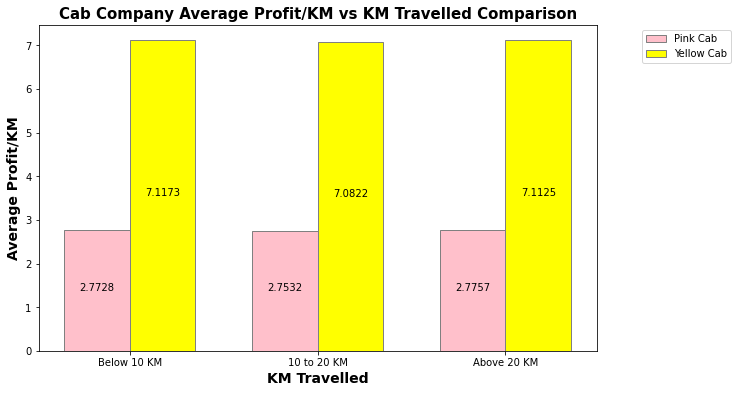

In [32]:
# Visulization of Results
x = ['Below 10 KM','10 to 20 KM','Above 20 KM']
company = ['Pink Cab', 'Yellow Cab']
values = [pink_mean, yellow_mean]
plt.figure(figsize=(10, 6))
bar_width = 0.35
r1 = np.arange(len(x))
r2 = [i + bar_width for i in r1]
ax1=plt.bar(r1, values[0], color='Pink', width=bar_width, edgecolor='grey', label='Pink Cab')
plt.bar(r2, values[1], color='Yellow', width=bar_width, edgecolor='grey', label='Yellow Cab')
for i, v in enumerate(yellow_mean):
    plt.text(i+0.35, v/2, str(round(v,4)), ha='center', color='black', fontsize=10)
for i, v in enumerate(pink_mean):
    plt.text(i, v/2, str(round(v,4)), ha='center', color='black')
plt.xlabel('KM Travelled', fontweight='bold', fontsize = 14)
plt.ylabel('Average Profit/KM', fontweight='bold', fontsize = 14)
plt.xticks([r + bar_width/2 for r in range(len(x))], x)
plt.title('Cab Company Average Profit/KM vs KM Travelled Comparison',fontsize = 15, fontweight='bold' )
plt.legend(bbox_to_anchor=(1.25, 1))
plt.show()

In [ ]:
# Hypothesis 1 Conclusion: It is clearly evident that ride distance is not affecting the profits. 
# For all the distance ranges, the average profit per KM remains nearly same. However, it is to
# be noted that the average profit per KM for yellow cab (around 7.1) is higher than pink cab (around 2.7)
# the Profit values seem to be symmetric even in terms of the cab company for different distance ranges.

In [ ]:
# Hypothesis 2: Is number of rides affecting the profit margin of the company?

# Reason for the Hypothesis: more number of purchases will generally contribute to a larger 
# profit that few many purchases. It can be possible that a company is making higher profits
# beacuse of greater market share and more rides

In [138]:
# Let us first understand the data in term of Number rides with each company

yellow_data = master_data[master_data['Company']=='Yellow Cab']
pink_data = master_data[master_data['Company']=='Pink Cab']

print('Yellow Cab ride count:',len(yellow_data))
print('Pink Cab ride count:',len(pink_data))

print('Average Profit Margin for Yellow Cab', round(yellow_data['Profit Margin'].mean(),2))
print('Average Profit Margin for Pink Cab', round(pink_data['Profit Margin'].mean(),2))

# We can see that there are 4X times Yellow Cab rides compared to Pink Cab
# Also the profit margin of Yellow cab is 2X that of Pink Cab. For now, 
# we can assert that this can be due to more rides compared to Pink Cab.
# Let us investigate further on this

Yellow Cab ride count: 274681
Pink Cab ride count: 84711
Average Profit Margin for Yellow Cab 30.13
Average Profit Margin for Pink Cab 17.38


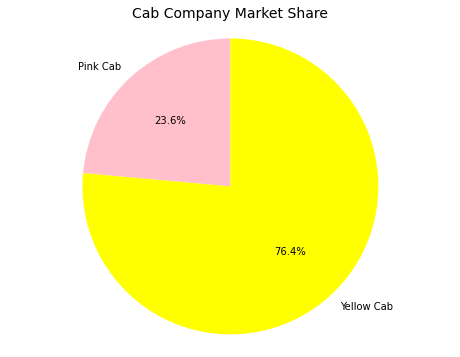

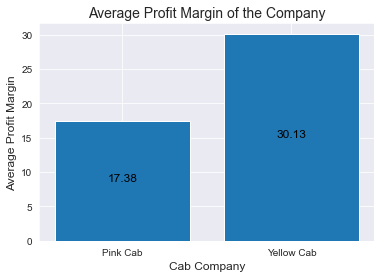

In [34]:
# Visualizing the results
plt.figure(figsize=(8, 6))
labels = ['Pink Cab', 'Yellow Cab']
rides = [84711, 274681]
margin = [17.38, 30.13]
plt.pie(rides, labels=labels, autopct='%1.1f%%', startangle=90, colors=['Pink', 'Yellow'])
plt.axis('equal')
plt.title('Cab Company Market Share', fontsize = 14)
plt.show()

sns.set_style('darkgrid')
plt.bar(labels,margin)
plt.xlabel('Cab Company', fontsize = 12)
plt.ylabel('Average Profit Margin', fontsize = 12)
plt.title('Average Profit Margin of the Company', fontsize = 14)
for i, v in enumerate(margin):
    plt.text(i, v/2, str(round(v,4)), ha='center', color='black',fontsize = 12)
plt.show()


In [154]:
# Let us sample the yellow cab data such that there are same number of rides for both Yellow and Pink Cab
# We can now try to analyze the profit for the same number of rides for both companies
yellow_sample = yellow_data.sample(n = len(pink_data))
print('Average Profit Marging for Yellow Cab after sampling to same number of rides as Pink:', round(yellow_sample['Profit Margin'].mean(),2))
print('Average Profit Marging for Pink Cab', round(pink_data['Profit Margin'].mean(),2))

# Let us further sample the number of rides for both companies to a smaller number say 100
yellow_sample1 = yellow_data.sample(n = 100)
pink_sample1 = pink_data.sample(n = 100)
mean1= []
mean2 = []
mean1.append(round(yellow_sample1['Profit Margin'].mean(),2))
mean2.append(round(pink_sample1['Profit Margin'].mean(),2))
print('\nAverage Profit Marging for Yellow Cab for 100 rides:', round(yellow_sample1['Profit Margin'].mean(),2))
print('Average Profit Marging for Pink Cab for 100 rides', round(pink_sample1['Profit Margin'].mean(),2))

# Let us further sample the number of rides for both companies to a smaller number say 10
yellow_sample2 = yellow_data.sample(n = 10)
pink_sample2 = pink_data.sample(n = 10)
mean1.append(round(yellow_sample2['Profit Margin'].mean(),2))
mean2.append(round(pink_sample2['Profit Margin'].mean(),2))
print('\nAverage Profit Marging for Yellow Cab for 10 rides:', round(yellow_sample2['Profit Margin'].mean(),2))
print('Average Profit Marging for Pink Cab for 10 rides', round(pink_sample2['Profit Margin'].mean(),2))

# We can see that there is slight difference in the margin for few number of rides
# This can be ignored since the results might not be fullt true for smaller sample size

Average Profit Marging for Yellow Cab after sampling to same number of rides as Pink: 30.2
Average Profit Marging for Pink Cab 17.38

Average Profit Marging for Yellow Cab for 100 rides: 25.49
Average Profit Marging for Pink Cab for 100 rides 18.84

Average Profit Marging for Yellow Cab for 10 rides: 22.33
Average Profit Marging for Pink Cab for 10 rides 12.85


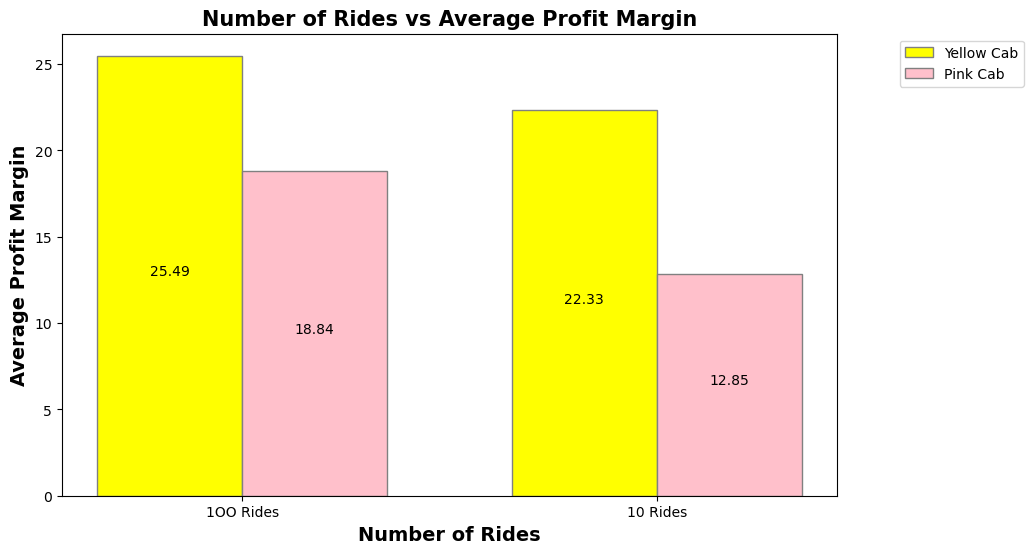

In [155]:
# Visulization of Results
x = ['1OO Rides','10 Rides']
company = ['Pink Cab', 'Yellow Cab']
val = [mean1,mean2]
plt.figure(figsize=(10, 6))
bar_width = 0.35
r1 = np.arange(len(x))
r2 = [i + bar_width for i in r1]
plt.bar(r1, val[0], color='Yellow', width=bar_width, edgecolor='grey', label='Yellow Cab')
plt.bar(r2, val[1], color='Pink', width=bar_width, edgecolor='grey', label='Pink Cab')
for i, v in enumerate(mean2):
    plt.text(i+0.35, v/2, str(round(v,4)), ha='center', color='black', fontsize=10)
for i, v in enumerate(mean1):
    plt.text(i, v/2, str(round(v,4)), ha='center', color='black')
plt.xlabel('Number of Rides', fontweight='bold', fontsize = 14)
plt.ylabel('Average Profit Margin', fontweight='bold', fontsize = 14)
plt.xticks([r + bar_width/2 for r in range(len(x))], x)
plt.title('Number of Rides vs Average Profit Margin',fontsize = 15, fontweight='bold' )
plt.legend(bbox_to_anchor=(1.25, 1))
plt.show()

In [ ]:
# Hypothesis 2 Conclusion: It is clearly evident from the data and testing that Yellow cab is collecting fares at 
# a larger profit margin compared to pink cab. Even when comparing 100 random rides, the profit margin of yellow cab stands
# greater than pink cab. However comparing the results for 10 rides, the difference seems to reduce and oscillate.
# This shows pink cab is actually charging some of its rides for a larger profit. We can conclude that there is a little
# effect of the number of rides in the profit margin but the major factor seems to be margin the company tries to keeps 
# for each ride


In [ ]:
# Hypothesis 3: Companies are charging aged customers more than youngsters

# Reason for the Hypothesis: It is expected that with age, the person has acquired some wealth 
# and is willing to pay more. Also, the travel risks associated with young people are comparatively
# less in terms of medical emergencies. Companies also look to provide incentives to students

In [37]:
# We shall consider the three age groups young(<30), middle(30-50) and old(>50) 
# and try to assess the per capita profit made by companies
age_young = master_data[master_data['Age'] <= 30]
age_middle = master_data[(master_data['Age']>30) & (master_data['Age']<=50)]
age_old = master_data[master_data['Age'] > 50]

print('Average Profit/KM for Young Aged:', age_young['Profit per KM'].mean())
print('Average Profit/KM for Middle Aged:', age_middle['Profit per KM'].mean())
print('Average Profit/KM for Old Aged:', age_old['Profit per KM'].mean())

print('\nAverage Profit Margin for Young Aged:', age_young['Profit Margin'].mean())
print('Average Profit Margin for Middle Aged:', age_middle['Profit Margin'].mean())
print('Average Profit Margin for Old Aged:', age_old['Profit Margin'].mean())

# We can see a dip in profits made for people aged more than 50

Average Profit/KM for Young Aged: 6.075456328574115
Average Profit/KM for Middle Aged: 6.1480192878983555
Average Profit/KM for Old Aged: 5.931511269965756

Average Profit Margin for Young Aged: 27.116069695228425
Average Profit Margin for Middle Aged: 27.322170769591413
Average Profit Margin for Old Aged: 26.639202228497663


In [38]:
# Let us undestand the calculations in terms of each Cab Company
mean1 = []
mean2 = []
pink_young = age_young[age_young['Company'] == 'Pink Cab']
yellow_young = age_young[age_young['Company'] == 'Yellow Cab']
mean1.append(pink_young['Profit per KM'].mean())
mean2.append(yellow_young['Profit per KM'].mean())
print('Average Profit/KM for Young Aged Pink Cab Customers', pink_young['Profit per KM'].mean())
print('Average Profit/KM for Young Aged Yellow Cab Customers', yellow_young['Profit per KM'].mean())

pink_middle = age_middle[age_middle['Company'] == 'Pink Cab']
yellow_middle = age_middle[age_middle['Company'] == 'Yellow Cab']
mean1.append(pink_middle['Profit per KM'].mean())
mean2.append(yellow_middle['Profit per KM'].mean())
print('\nAverage Profit/KM for Middle Aged Pink Cab Customers', pink_middle['Profit per KM'].mean())
print('Average Profit/KM for middle Aged Yellow Cab Customers', yellow_middle['Profit per KM'].mean())

pink_old = age_old[age_old['Company'] == 'Pink Cab']
yellow_old = age_old[age_old['Company'] == 'Yellow Cab']
mean1.append(pink_old['Profit per KM'].mean())
mean2.append(yellow_old['Profit per KM'].mean())
print('\nAverage Profit/KM for Old Aged Pink Cab Customers', pink_old['Profit per KM'].mean())
print('Average Profit/KM for Old Aged Yellow Cab Customers', yellow_old['Profit per KM'].mean())

print('\nAverage Profit Margin for Young Aged Pink Cab Customers', pink_young['Profit Margin'].mean())
print('Average Profit Margin for Young Aged Yellow Cab Customers', yellow_young['Profit Margin'].mean())

print('\nAverage Profit Margin for Middle Aged Pink Cab Customers', pink_middle['Profit Margin'].mean())
print('Average Profit Margin for Middle Aged Yellow Cab Customers', yellow_middle['Profit Margin'].mean())

print('\nAverage Profit Margin for Old Aged Pink Cab Customers', pink_old['Profit Margin'].mean())
print('Average Profit Margin for Old Aged Yellow Cab Customers', yellow_old['Profit Margin'].mean())

# Yellow cab is providing incentives to old aged customers but pink cab is making the same profit
# irrespective of age

Average Profit/KM for Young Aged Pink Cab Customers 2.7862374505243737
Average Profit/KM for Young Aged Yellow Cab Customers 7.096967686738477

Average Profit/KM for Middle Aged Pink Cab Customers 2.758679091432881
Average Profit/KM for middle Aged Yellow Cab Customers 7.1814695277160805

Average Profit/KM for Old Aged Pink Cab Customers 2.756558224648121
Average Profit/KM for Old Aged Yellow Cab Customers 6.922411756297505

Average Profit Margin for Young Aged Pink Cab Customers 17.45620751301139
Average Profit Margin for Young Aged Yellow Cab Customers 30.116070395482495

Average Profit Margin for Middle Aged Pink Cab Customers 17.345348361771528
Average Profit Margin for Middle Aged Yellow Cab Customers 30.364222883667054

Average Profit Margin for Old Aged Pink Cab Customers 17.275966674181106
Average Profit Margin for Old Aged Yellow Cab Customers 29.561461087756847


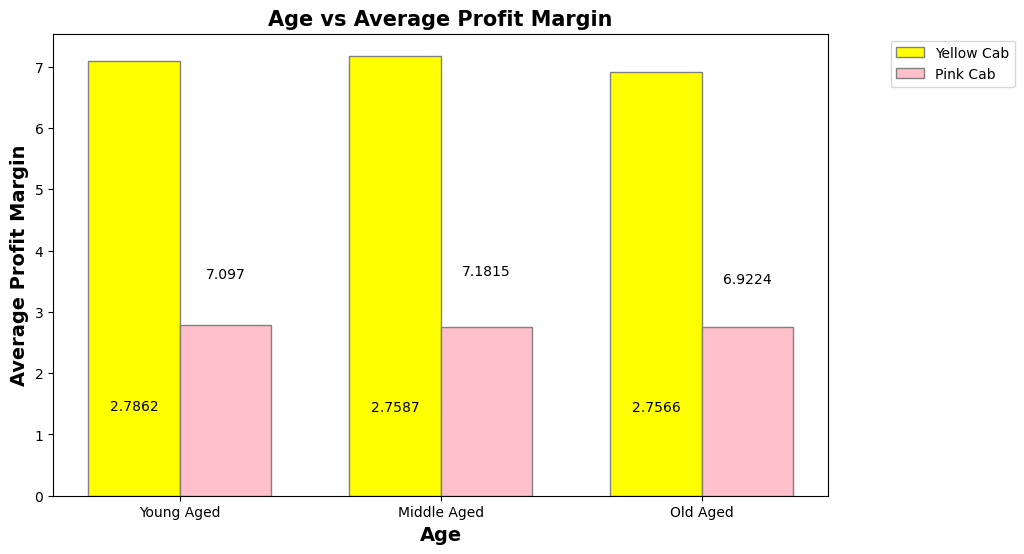

In [39]:
# Visualizing Results
sns.reset_defaults()
x = ['Young Aged','Middle Aged', 'Old Aged']
company = ['Pink Cab', 'Yellow Cab']
val = [mean2,mean1]
plt.figure(figsize=(10, 6))
bar_width = 0.35
r1 = np.arange(len(x))
r2 = [i + bar_width for i in r1]
plt.bar(r1, val[0], color='Yellow', width=bar_width, edgecolor='grey', label='Yellow Cab')
plt.bar(r2, val[1], color='Pink', width=bar_width, edgecolor='grey', label='Pink Cab')
for i, v in enumerate(mean2):
    plt.text(i+0.35, v/2, str(round(v,4)), ha='center', color='black', fontsize=10)
for i, v in enumerate(mean1):
    plt.text(i, v/2, str(round(v,4)), ha='center', color='black')
plt.xlabel('Age', fontweight='bold', fontsize = 14)
plt.ylabel('Average Profit Margin', fontweight='bold', fontsize = 14)
plt.xticks([r + bar_width/2 for r in range(len(x))], x)
plt.title('Age vs Average Profit Margin',fontsize = 15, fontweight='bold' )
plt.legend(bbox_to_anchor=(1.25, 1))
plt.show()

In [ ]:
# Hypothesis 3 Conclusion: It is observed that in contrary to the hypothesis, Yellow cabs are charging marginally less 
# for old aged people. The said hypothesis therefore does not hold true. It can also be inferred that Pink cab is not 
# considering age factor of customer in charging the price but yellow cab is charging slighly higher for middle aged and 
# slighly lower for young aged. The overall profit charged by Yellow cab is higher on any day from the results

In [ ]:
# Hypothesis 4: Yellow cab is expanding its business faster than pink cab over years

# Reason for Hypothesis: Yellow cab seems to perform better for the situations we have considered
# It is imperative that a company tries to expand its business with profits. Pink cab might be 
# giving reduced fares to attract more customers in an attempt to expand

In [40]:
# Getting number of rides for each year for different Companies
master_data['Year'] = master_data['Date of Travel'].dt.year
group_year = master_data.groupby(['Year','Company']).count()
count_values = group_year['Transaction ID']
print(count_values)
count_values = list(count_values)
# There seems to be a recession in 2018 that has mitigated the growth for that year

Year  Company   
2016  Pink Cab      25080
      Yellow Cab    82239
2017  Pink Cab      30321
      Yellow Cab    98189
2018  Pink Cab      29310
      Yellow Cab    94253
Name: Transaction ID, dtype: int64


In [41]:
# Year on Year growth rate for each Cab Company

pink_1716 = (count_values[2]-count_values[0])*100/count_values[0]
print('YOY growth percent for the years 2016-2017 for Pink Cab:',round(pink_1716,2))
yellow_1716 = (count_values[3]-count_values[1])*100/count_values[1]
print('YOY growth percent for the years 2016-2017 for Yellow Cab:',round(yellow_1716,2))
pink_1817 = (count_values[4]-count_values[2])*100/count_values[2]
print('\nYOY growth percent for the years 2018-2017 for Pink Cab:',round(pink_1817,2))
yellow_1817 = (count_values[5]-count_values[3])*100/count_values[3]
print('YOY growth percent for the years 2018-2017 for Pink Cab:',round(yellow_1817,2))

# There clearly seem to be a recession in 2018 that the growth went negative 
# The growth rate seem to be same for both companies

YOY growth percent for the years 2016-2017 for Pink Cab: 20.9
YOY growth percent for the years 2016-2017 for Yellow Cab: 19.39

YOY growth percent for the years 2018-2017 for Pink Cab: -3.33
YOY growth percent for the years 2018-2017 for Pink Cab: -4.01


In [ ]:
#Visualization of results
plt.plot([2016,2017,2018],[count_values[0],count_values[2],count_values[4]], 'r', label = 'Pink Cab')
plt.plot([2016,2017,2018],[count_values[1],count_values[3],count_values[5]], 'b', label = 'Yellow Cab') 
plt.title('Total Rides for different years')
plt.xlabel('Year')
plt.ylabel('Total Rides')
plt.xticks([2016,2017,2018])
plt.legend()

In [ ]:
# Hypothesis 4 Conclusion: Both the companies have nearly the same YOY growth. Therefore the Hypothesis
# doesnot hold true. From the data given, initially Yellow cab has got more number of users and thus for
# the same growth, Yellow cab has gathered more users than Pink Cab

In [ ]:
# Hypothesis 5: Is the ride location contributing to the profit or costs

# Reason for Hypothesis: Some cities have higher population, while some other cities have higher 
# operational costs and taxes. Companies may benefit from tax incentives and larger populations

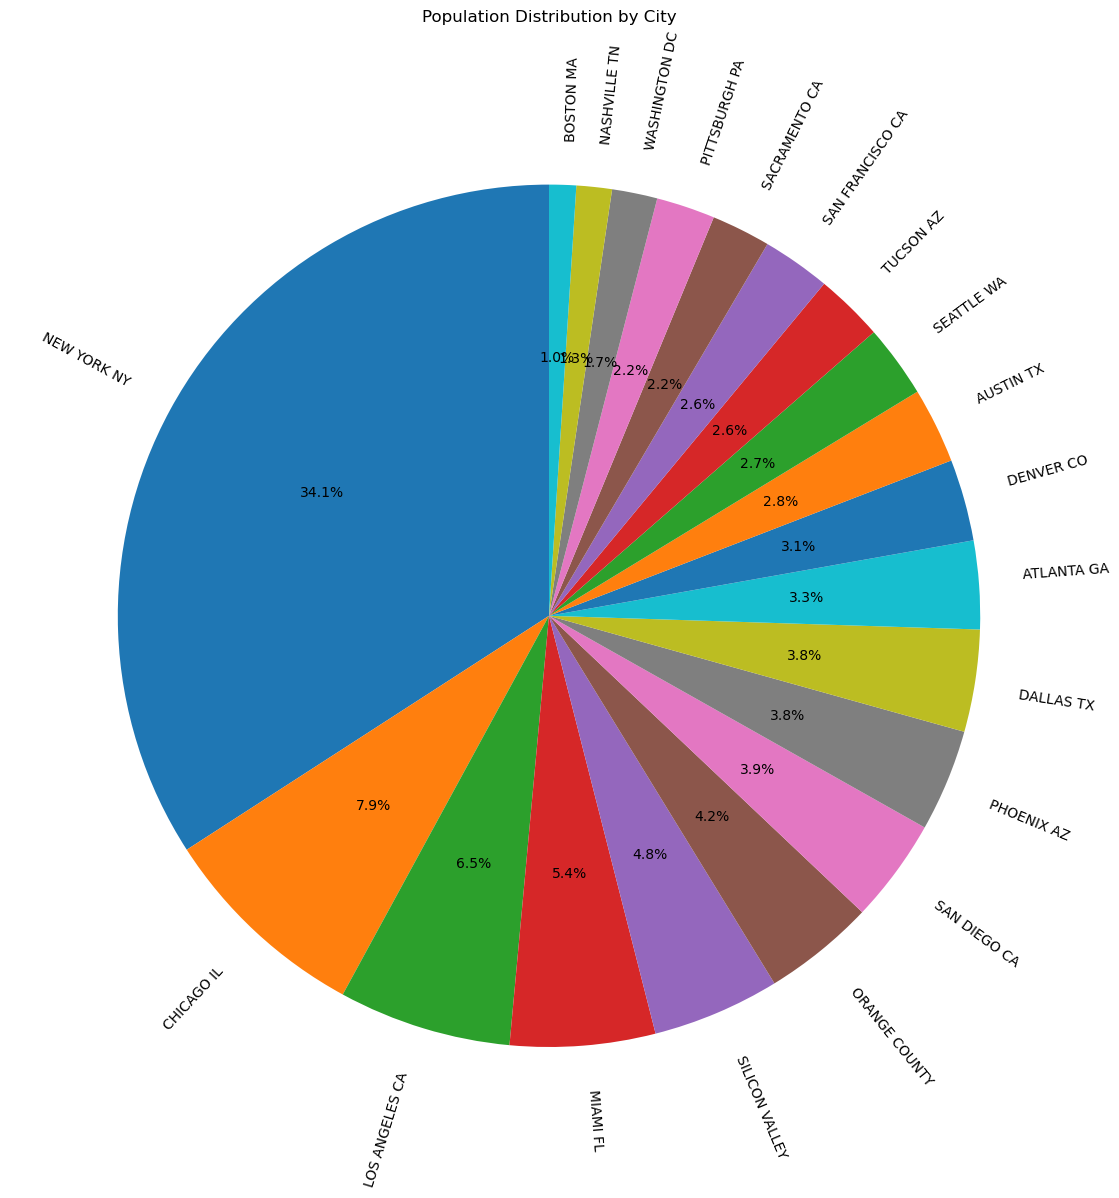

In [156]:
# Population representation for each city
plt.figure(figsize=(14, 14))
plt.pie(city_data['Population'], labels=city_data['City'], autopct='%1.1f%%',  rotatelabels=True, startangle=90)
plt.title('Population Distribution by City', pad = 40)
plt.show()

# New York is the most populated city from the given cities

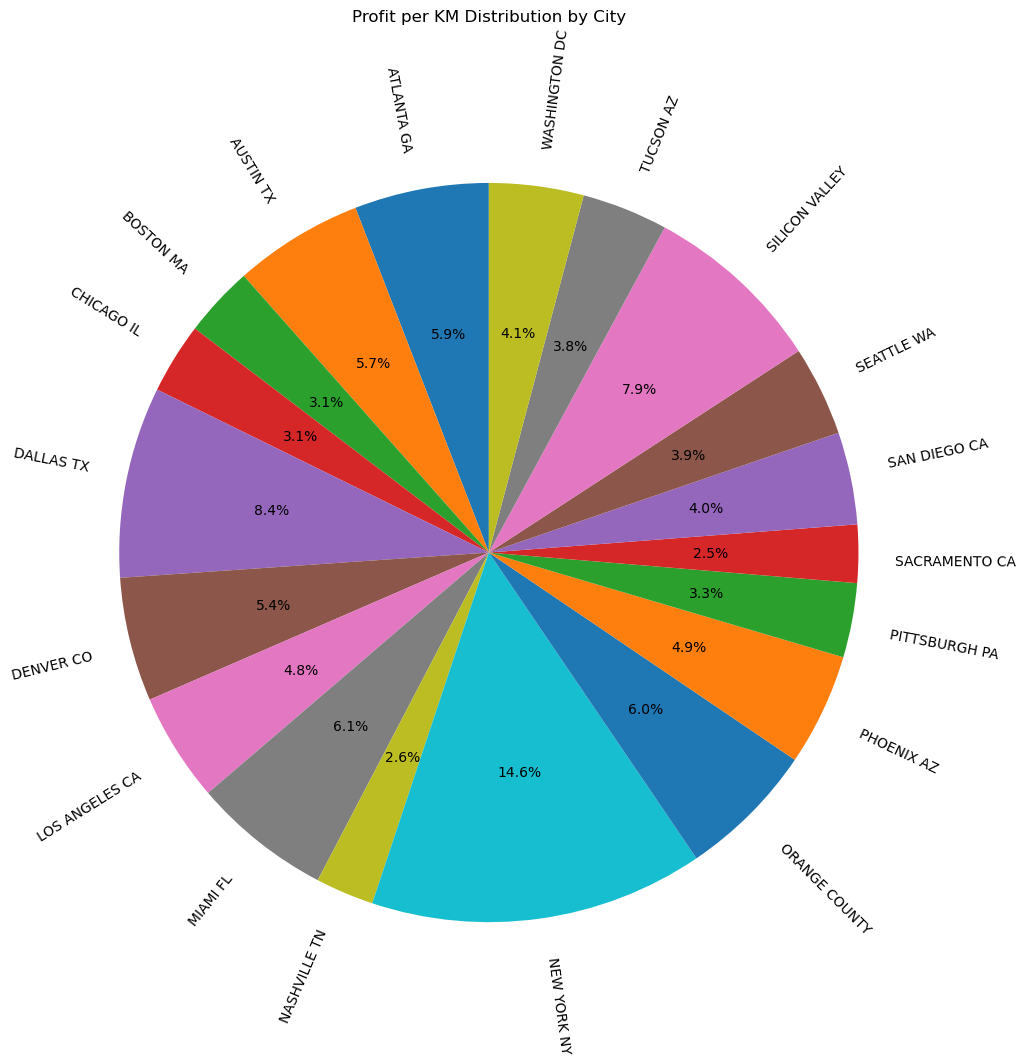

In [72]:
# City vs Profit/KM
plt.figure(figsize=(12, 12))
city_group = master_data.groupby(['City']).mean().reset_index()
plt.pie(city_group['Profit per KM'], labels=city_group['City'], autopct='%1.1f%%',  rotatelabels=True, startangle=90)
plt.title('Profit per KM Distribution by City', pad = 50)
plt.show()
# There are some intresting insights. Dallas representing 3.8% of population contributes to greater
# profit/KM. Chicago desipite having a larger population has less Profit/KM, Silicon Valley and Atlanta
# seems to have higher wages and thus contibuting more the population. New york with no exception stands first in
# population and profit

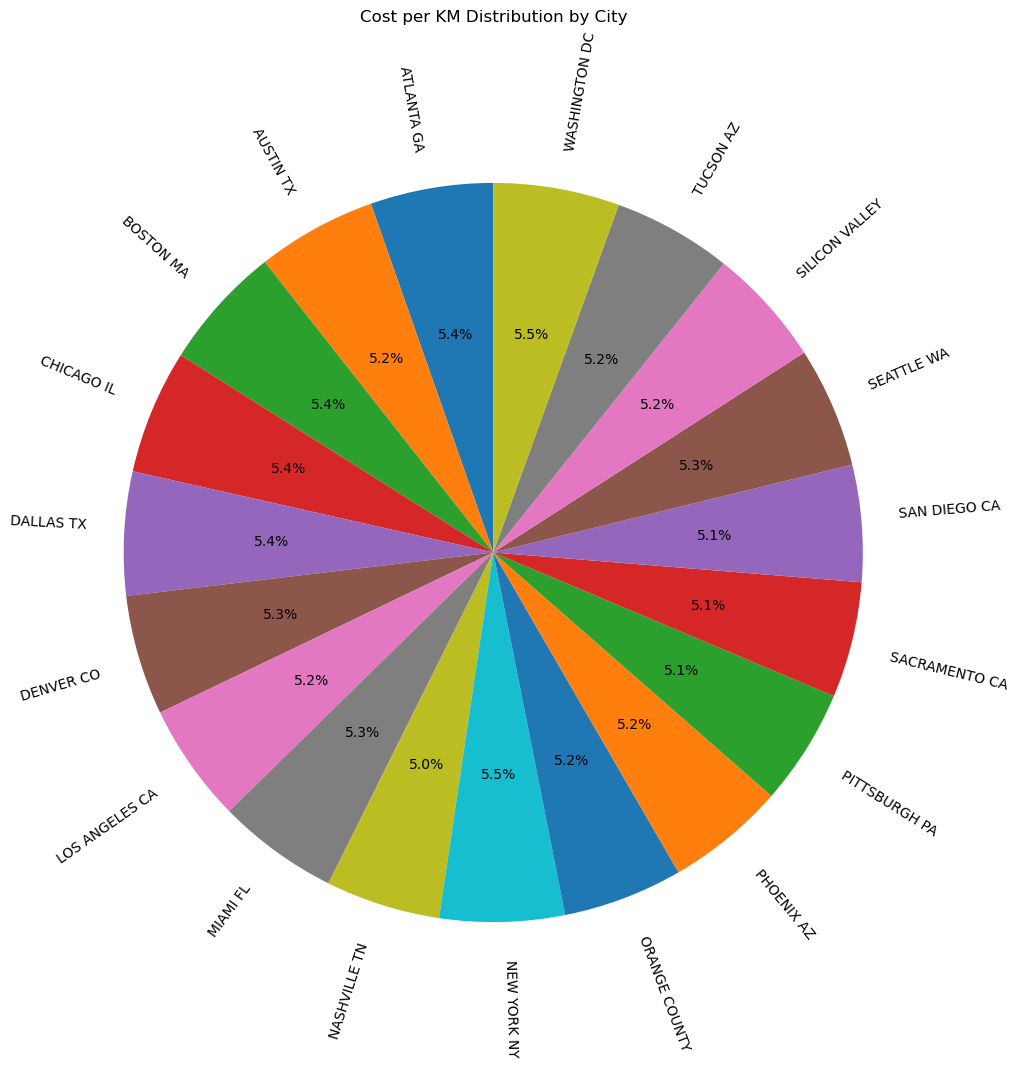

In [73]:
# City vs Cost/KM
plt.figure(figsize=(12, 12))
plt.pie(city_group['Cost per KM'], labels=city_group['City'], autopct='%1.1f%%',  rotatelabels=True, startangle=90)
plt.title('Cost per KM Distribution by City', pad = 50)
plt.show()
# It pie chart clearly shiws that there is not much difference in operational costs for the cities.
# Companies are charging greated prices based on the wages and per capita income of the city

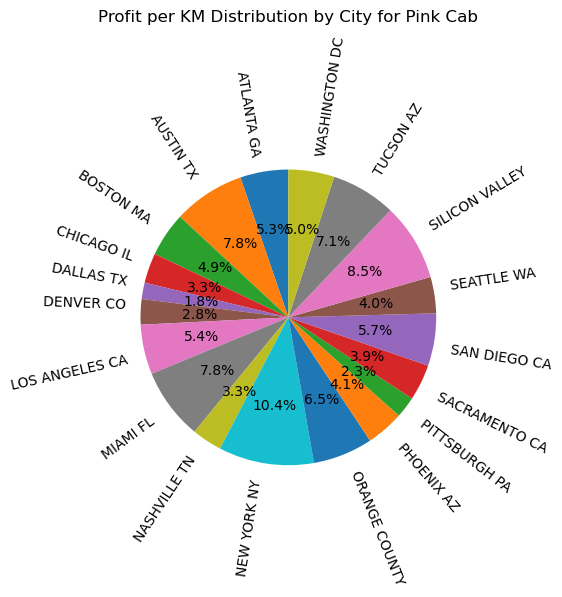

In [80]:
# Profit/KM for Pink Cab
city_company_group = master_data.groupby(['Company','City']).mean().reset_index()
pink_group = city_company_group[city_company_group['Company']=='Pink Cab']
plt.pie(pink_group['Profit per KM'], labels=pink_group['City'], autopct='%1.1f%%',  rotatelabels=True, startangle=90)
plt.title('Profit per KM Distribution by City for Pink Cab', pad = 80)
plt.show()
# Pink cab is doing better in silicon valley, los Angeles, Miami, Austin and New York
# It is intresting that Austin is contributing larger compared to its population 

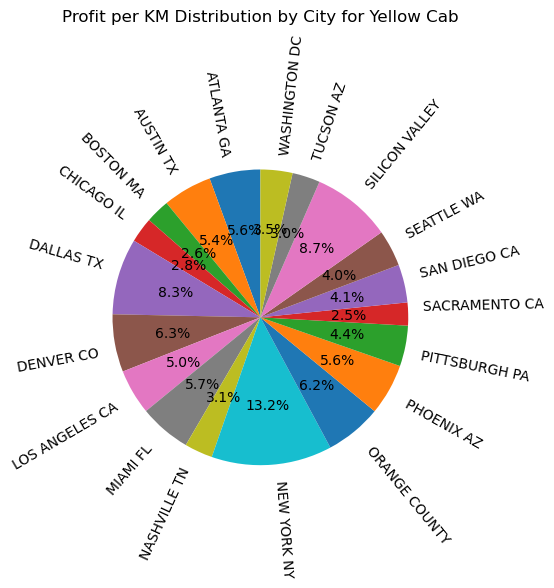

In [83]:
# Profit/KM for Yellow Cab
city_company_group = master_data.groupby(['Company','City']).mean().reset_index()
yellow_group = city_company_group[city_company_group['Company']=='Yellow Cab']
plt.pie(yellow_group['Profit per KM'], labels=yellow_group['City'], autopct='%1.1f%%',  rotatelabels=True, startangle=90)
plt.title('Profit per KM Distribution by City for Yellow Cab', pad = 80)
plt.show()
# Yellow cab is doing better in New York, Dallas, Solicon Valley and Denver

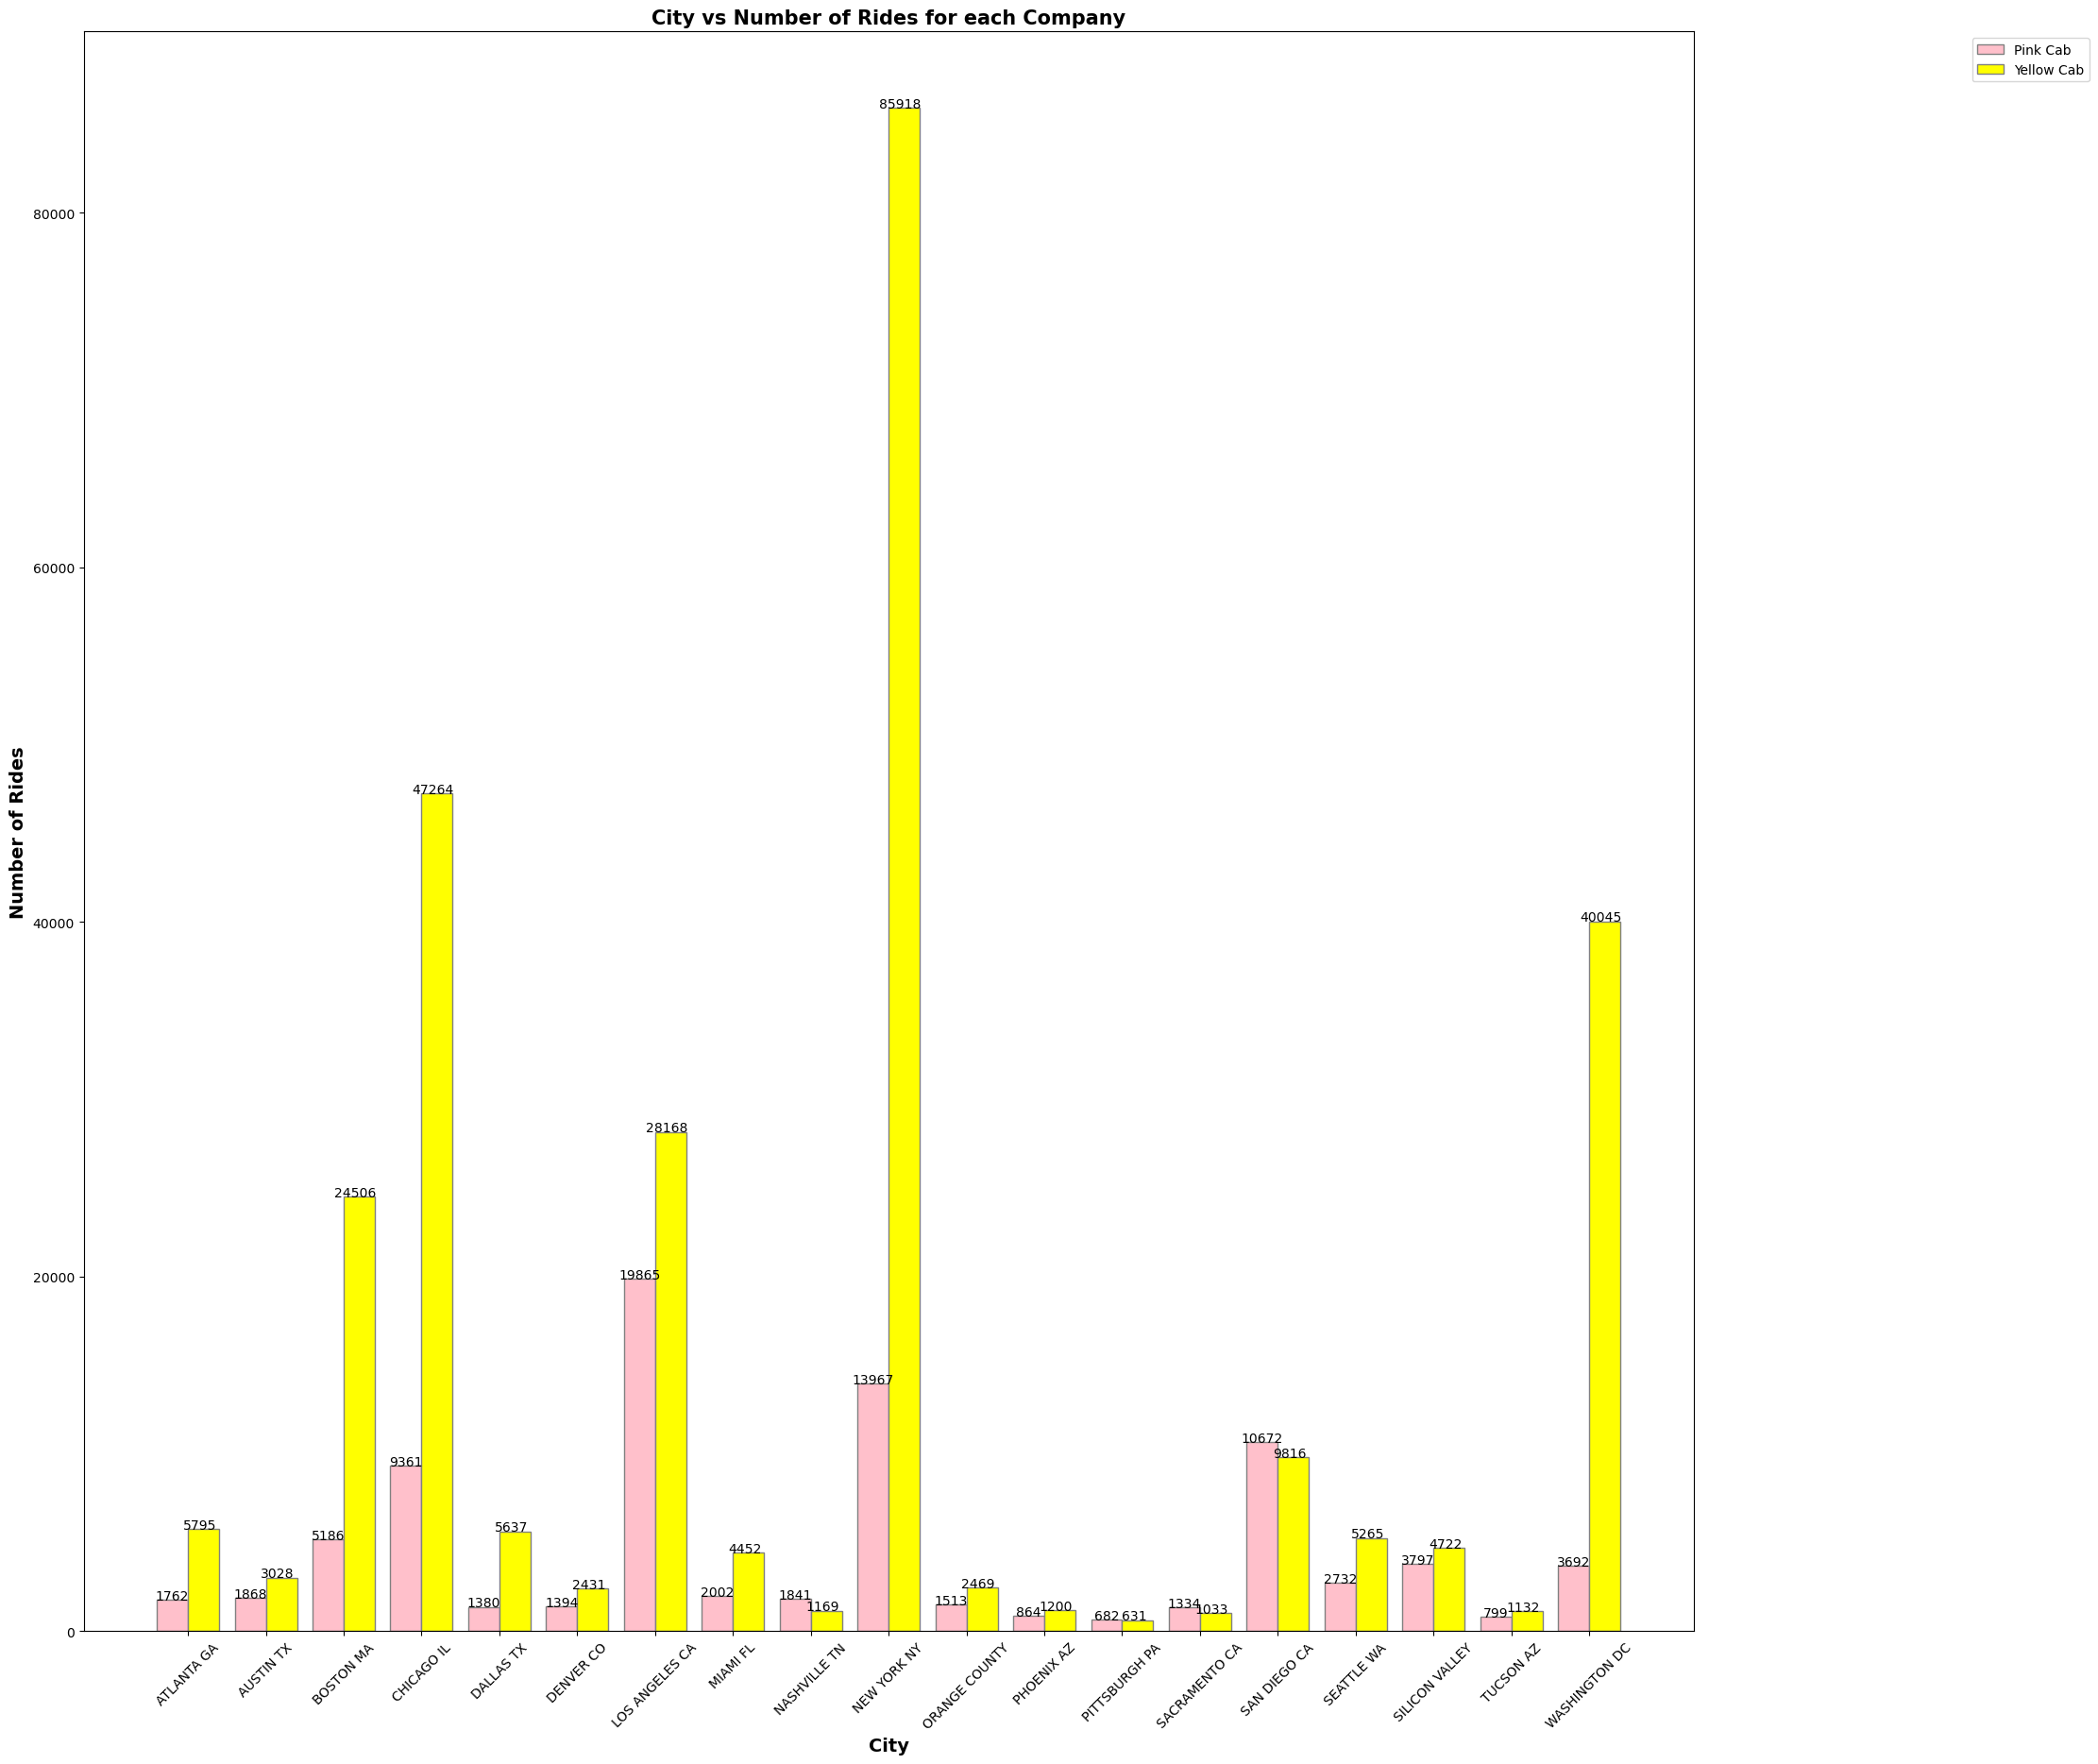

In [157]:
# Rides per city for Both the companies
sns.reset_defaults()
company = ['Pink Cab', 'Yellow Cab']
rides_city = master_data.groupby(['Company','City']).count().reset_index()
x = list(rides_city['City'].unique())
pink_group = rides_city[rides_city['Company']=='Pink Cab']
yellow_group = rides_city[rides_city['Company']=='Yellow Cab']
list1 = list(pink_group['Transaction ID'])
list2 = list(yellow_group['Transaction ID'])
val = [list1,list2]
plt.figure(figsize=(22, 22))
bar_width = 0.4
r1 = np.arange(len(x))
r2 = [i + bar_width for i in r1]
plt.bar(r1, np.array(val[0]),width = bar_width, color='Pink', edgecolor='grey', label='Pink Cab')
plt.bar(r2, val[1], width = bar_width,color='Yellow', edgecolor='grey', label='Yellow Cab')
for i, v in enumerate(list2):
    plt.text(i+.35, v, str(round(v,4)), ha='center', color='black', fontsize=10)
for i, v in enumerate(list1):
    plt.text(i, v, str(round(v,4)), ha='center', color='black')
plt.xlabel('City', fontweight='bold', fontsize = 14)
plt.ylabel('Number of Rides', fontweight='bold', fontsize = 14)
plt.xticks([r + bar_width/2 for r in range(len(x))], x, rotation = 45)

plt.title('City vs Number of Rides for each Company',fontsize = 15, fontweight='bold' )
plt.legend(bbox_to_anchor=(1.25, 1))
plt.show()

In [ ]:
#Hypothesis 5 Conclusion: From the analysis, we can see that both the companies are doing good
# in silicon valley and New York. There seems to be a monopoly of Yellow cab in some areas for example 
# washington. Except for San Diego, Sacramento and Nashville and Pitsburg, Yellow cab has the highest number of rides.
# Ride location is actually being a factor for the profit made by companies

In [ ]:
# Conclusion: From the Hypothesis Testing we have done, it is very clear that
# Yellow Cab company is leading in many areas. This include Average profit/KM, 
# Ridership, future forecast, operational costs, Age considerations, city coverage
# and many more. It is recommeded to invest in Yellow Cab company for the same 
# principal compared to Pink Cab
